# Assignment 2 - Supervised Machine Learning Fundamentals

## *Yuanjing Zhu*
Netid: yz792

Note: this assignment falls under collaboration Mode 2: Individual Assignment – Collaboration Permitted. Please refer to the syllabus for additional information.

Instructions for all assignments can be found [here](https://github.com/kylebradbury/ids705/blob/master/assignments/_Assignment%20Instructions.ipynb), and is also linked to from the [course syllabus](https://kylebradbury.github.io/ids705/index.html).

Total points in the assignment add up to 90; an additional 10 points are allocated to presentation quality.

## Learning Objectives:
By successfully completing this assignment you will be able to...
- Explain the bias-variance tradeoff of supervised machine learning and the impact of model flexibility on algorithm performance
- Perform supervised machine learning training and performance evaluation
- Implement a k-nearest neighbors machine learning algorithm from scratch in a style similar to that of popular machine learning tools like `scikit-learn`
- Describe how KNN classification works, the method's reliance on distance measurements, and the impact of higher dimensionality on computational speed
- Apply regression (linear regression) and classification (KNN) supervised learning techniques to data and evaluate the performance of those methods
- Construct simple feature transformations for improving model fit in linear models
- Fit a `scikit-learn` supervised learning technique to training data and make predictions using it

In [114]:
# MAC USERS TAKE NOTE:
# For clearer plots in Jupyter notebooks on macs, run the following line of code:
# %config InlineBackend.figure_format = 'retina'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mode
import time

import operator
import os
os.chdir('F:/Duke MIDS/705_ML/Assignment/02')

---

# Conceptual Questions on Supervised Learning

## 1
**[4 points]**
For each part below, indicate whether we would generally expect the performance of a flexible statistical learning method to be *better* or *worse* than an inflexible method. Justify your answer.

1. The sample size $n$ is extremely large, and the number of predictors $p$ is small.
2. The number of predictors $p$ is extremely large, and the number of observations $n$ is small.
3. The relationship between the predictors and response is highly non-linear.
4. The variance of the error terms, i.e. $\sigma^2 = Var(\epsilon)$, is extremely high

**ANSWER**

(1) When the sample size is extremely large and the number of predictors is small, we would generally expect the performance of a flexible method to be **better**. With a large sample size, there is more data available to train and the flexible method can better estimate the underlying relationship between predictors and response. Additionally, a large sample size with a small number of predictors can reduce the chance of overfitting, which is a common problem for flexible methods.

(2) When the number of predictors is extremely large and the number of observations is small, we would generally expect the performance of a flexible method to be **worse**. When there are many predictors, it is more likely that some of them are not related to the response or are highly correlated with each other. This can cause the flexible method to fit the noise in the data. With a small number of observations, the flexible method is more likely to overfitting.


(3) When the relationship between the predictors and response is highly non-linear, we would generally expect the performance of a flexible method to be **better**. Flexible method can better capture the non-linear relationship between predictors and response while inflexible models make strong assumptions about the relationship between predictors and response, which may not be true in reality.

(4) When the variance of the error terms is extremely high, we would generally expect the performance of a flexible method to be **worse**. High variance of the error terms means that there is a lot of noise in the data. Flexible method is more likely to overfitting as it tries too hard to fit the noise in the data but fail to generalize to new, unseen data. Inflexible method, on the other hand, is less likely to be affected by the noise and may perform better.

---

## 2
**[6 points]** For each of the following, (i) explain if each scenario is a classification or regression problem AND why, (ii) indicate whether we are most interested in inference or prediction for that problem AND why, and (iii) provide the sample size $n$ and number of predictors $p$ indicated for each scenario.

**(a)** We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.

**(b)** We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.

**(c)** We are interesting in predicting the % change in the US dollar in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the dollar, the % change in the US market, the % change in the British market, and the % change in the German market.

**ANSWER**


(a) 

> (i) **regression**: This is a regression problem because the outcome variable (CEO salary) is continuous.

> (ii) **inference**: This is an inference problem because we are interested in understanding the relationship between CEO salary and other variables, and which factors affect CEO salary.

> (iii) **n=500, p=3** : There are 500 firms that the data come from, so the sample size $n$ is 500. There are 3 predictors (profit, number of employees, industry), so the number of predictors $p$ is 3.

(b) 

> (i) **classification**: This is a classification problem because the outcome variable is categorical (success/failure).

> (ii) **prediction**: This is a prediction problem because we are interested in predicting whether the new product will be a success or a failure using the data of 20 similar products that were previously launched.

> (iii) **n=20, p=13**: Data comes from 20 similar products that were previously launched, so the sample size $n$ is 20. There are 13 predictors (price charged for the product, marketing budget, competition price, and ten other variables), so the number of predictors $p$ is 13.

(c) 

> (i) **regression**: This is a regression problem because the outcome variable (% change in the US dollar) is continuous.

> (ii) **prediction**: This is a prediction problem because we are interested in predicting the percentage change in the US dollar in relation to other factors.

> (iii) **n=52, p=3**: We collected the weekly data and there are 52 weeks in 2012, so the sample size $n$ is 52. There are 3 predictors (% change in the US market, % change in the British market, % change in the German market), so the number of predictors $p$ is 3.

---

# Practical Questions

## 3
**[6 points] Classification using KNN**. The table below provides a training dataset containing six observations (a.k.a. samples) ($n=6$) each with three predictors (a.k.a. features) ($p=3$), and one qualitative response variable (a.k.a. target).

*Table 1. Training dataset with $n=6$ observations in $p=3$ dimensions with a categorical response, $y$*

<style>
table th:first-of-type {
    width: 20%;
}
table th:nth-of-type(2) {
    width: 20%;
}
table th:nth-of-type(3) {
    width: 20%;
}
table th:nth-of-type(4) {
    width: 20%;
}
table th:nth-of-type(5) {
    width: 20%;
}
</style>

| Obs. | $x_1$ | $x_2$ | $x_3$ | $y$   |
|:----:|:-----:|:-----:|:-----:|:-----:|
| **1**| 0     | 3     | 0     | Red   |
| **2**| 2     | 0     | 0     | Red   |
| **3**| 0     | 1     | 3     | Red   |
| **4**| 0     | 1     | 2     | Blue  |
| **5**| -1    | 0     | 1     | Blue  |
| **6**| 1     | 1     | 1     | Red   |

We want to use the above training dataset to make a prediction, $\hat{y}$, for an unlabeled test data observation where $x_1=x_2=x_3=0$ using $K$-nearest neighbors. You are given some code below to get you started. *Note: coding is only required for part (a), for (b)-(d) please provide your reasoning based on your answer to part (a)*.

**(a)** Compute the Euclidean distance between each observation and the test point, $x_1=x_2=x_3=0$. Present your answer in a table similar in style to Table 1 with observations 1-6 as the row headers.

**(b)** What is our prediction, $\hat{y}$, when $K=1$ for the test point? Why?

**(c)** What is our prediction, $\hat{y}$, when $K=3$ for the test point? Why?

**(d)** If the Bayes decision boundary (the optimal decision boundary) in this problem is highly nonlinear, then would we expect the *best* value of $K$ to be large or small? Why?

**ANSWER**:

(a) The Euclidean distance between each observation and the test point, $x_1=x_2=x_3=0$ is:

In [3]:
import numpy as np
# prepare the data
X = np.array([[ 0, 3, 0],
              [ 2, 0, 0],
              [ 0, 1, 3],
              [ 0, 1, 2],
              [-1, 0, 1],
              [ 1, 1, 1]])   
y = np.array(['r','r','r','b','b','r'])
Xtest = np.array([0, 0, 0])

In [4]:
D = np.zeros((X.shape[0], 1))
for i in range(X.shape[0]): # calculate the distance between each observation and the test point
    D[i] = np.linalg.norm(X[i] - Xtest)    
print(f"The distance matrix between each observation and the test point is:\n{D}")

The distance matrix between each observation and the test point is:
[[3.        ]
 [2.        ]
 [3.16227766]
 [2.23606798]
 [1.41421356]
 [1.73205081]]


Euclidean distance between observation i and test point [0, 0, 0] is:
<style>
table th:first-of-type {
    width: 10%;
}
table th:nth-of-type(2) {
    width: 10%;
}
table th:nth-of-type(3) {
    width: 10%;
}
table th:nth-of-type(4) {
    width: 10%;
}
table th:nth-of-type(5) {
    width: 10%;
}
table th:nth-of-type(6) {
    width: 20%;
}
table th:nth-of-type(7) {
    width: 30%;
}
</style>

| Obs. | $x_1$ | $x_2$ | $x_3$ | $y$   | Euclidean distance | Rank (1: closest to the test point) |
|:----:|:-----:|:-----:|:-----:|:-----:|:------------------:|:-----------------------------------:|
| **1**| 0     | 3     | 0     | Red   |       3.000        |                5                    |
| **2**| 2     | 0     | 0     | Red   |       2.000        |                3                    |
| **3**| 0     | 1     | 3     | Red   |       3.162        |                6                    |
| **4**| 0     | 1     | 2     | Blue  |       2.236        |                4                    |
| **5**| -1    | 0     | 1     | Blue  |       1.414        |                1                    |
| **6**| 1     | 1     | 1     | Red   |       1.732        |                2                    |

(b) When $K = 1$, our prediction $\hat{y}$ for the test point is **blue**. This is because the most nearest neighbour of the test point is obs. 5 with a euclidean distance of 1.414. $\hat{y}$ should be the same as the label of obs.5, which is blue.

(c) When $K = 3$, our prediction $\hat{y}$ for the test point is **Red**. This is because the 3 nearest neighbours of the test point are obs.5, obs.6, and obs.2. They are labled as "Blue", "Red", "Red" respectively. Therefore, the label of the test point is assigned to be the label that appears most frequently among those 3 samples, which is "Red".

(d) If the Bayes decision boundary in this problem is highly nonlinear, then we would expect the *best* value of $K$ to be **small**. This is because a small value of $K$ means that each test point will have little constraint from its neighbours, leading to a more flexible and nonlinear decision boundary, which will better approximate the highly nonlinear Bayes decision boundary.<br>
In contrast, when using a high value of $K$ for the $KNN$ classifier, each test point's label is determined by considering a large number of its neighboring training points. This can lead to averaging out the noise and result in a smoother decision boundary that may not be able to accurately approximate the highly nonlinear Bayes decision boundary.

---

## 4
**[18 points] Build your own classification algorithm**.

**(a)** Build a working version of a binary KNN classifier using the skeleton code below. We'll use the `sklearn` convention that a supervised learning algorithm has the methods `fit` which trains your algorithm (for KNN that means storing the data) and `predict` which identifies the K nearest neighbors and determines the most common class among those K neighbors. *Note: Most classification algorithms typically also have a method `predict_proba` which outputs the confidence score of each prediction, but we will explore that in a later assignment.*

**(b)** Load the datasets to be evaluated here. Each includes training features ($\mathbf{X}$), and test features ($\mathbf{y}$) for both a low dimensional dataset ($p = 2$ features/predictors) and a higher dimensional dataset ($p = 100$ features/predictors). For each of these datasets there are $n=1000$ observations of each. They can be found in the `data` subfolder in the `assignments` folder on github. Each file is labeled similar to `A2_X_train_low.csv`, which lets you know whether the dataset is of features, $X$, targets, $y$; training or testing; and low or high dimensions.

**(c)** Train your classifier on first the low dimensional dataset and then the high dimensional dataset with $k=5$. Evaluate the classification performance on the corresponding test data for each of those trained models. Calculate the time it takes each model to make the predictions and the overall accuracy of those predictions for each corresponding set of test data - state each.

**(d)** Compare your implementation's accuracy and computation time to the scikit learn [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) class. How do the results and speed compare to your implementation?

**(e)** Some supervised learning algorithms are more computationally intensive during training than testing. What are the drawbacks of the prediction process being slow? In what cases in practice might slow testing (inference) be more problematic than slow training?

**ANSWER**:

(a) Build a binary KNN classifier.

In [5]:
# Skeleton code for part (a) to write your own kNN classifier

class Knn:
# k-Nearest Neighbor class object for classification training and testing
    def __init__(self):
        pass

    def fit(self, x, y):
        '''
        Train the classifier with the training data and labels
        Input: x is the training data, y is the training class label
        '''
        # Save the training data to properties of this class
        self.xtrain = x   
        self.ytrain = y
        
    def predict(self, x, k):
        '''
        Return the predicted class label using the k-nearest neighbors
        Input: x is the test data, k is the number of nearest neighbors
        Output: y_hat is an array of predicted class label 
        '''
        y_hat = [] # Variable to store the estimated class label  
        # Calculate the distance from each vector in x to the training data        
        for i in range(x.shape[0]):
            # calculate the distance between x[i] and each row of self.xtrain
            dist_sqr = np.sum((x.iloc[i,:] - self.xtrain) * (x.iloc[i,:] - self.xtrain), axis=1)    
            # make sure the length of dist_sqr is the same as the number of rows in self.xtrain
            assert len(dist_sqr) == self.xtrain.shape[0]     
            # find the index of the k nearest neighbors
            idx = np.argsort(dist_sqr)[: k]                  
            # find the most common class label among the k nearest neighbors
            y_hat.append(mode(self.ytrain.iloc[idx].values.flatten()))   
  
        # Return the estimated targets
        return np.array(y_hat)

# Metric of overall classification accuracy
#  (a more general function, sklearn.metrics.accuracy_score, is also available)
def accuracy(y,y_hat):
    nvalues = len(y)
    accuracy = sum(y == y_hat) / nvalues
    return accuracy

(b) Load the datasets

In [6]:
# Load low dimensional data
Xtrain_lo = pd.read_csv("A2_X_train_low.csv", header=None)
ytrain_lo = pd.read_csv("A2_y_train_low.csv", header=None)
Xtest_lo = pd.read_csv("A2_X_test_low.csv", header=None)
ytest_lo = pd.read_csv("A2_y_test_low.csv", header=None)
# Load high dimensional data
Xtrain_hi = pd.read_csv("A2_X_train_high.csv", header=None)
ytrain_hi = pd.read_csv("A2_y_train_high.csv", header=None)
Xtest_hi = pd.read_csv("A2_X_test_high.csv", header=None)
ytest_hi = pd.read_csv("A2_y_test_high.csv", header=None)

(c) Train the self-defined KNN classifier with low and high dimensional datasets with $k = 5$. Evaluate model accuracy and compute time. 

In [8]:
# train KNN classifier with low dimensional dataset
start = time.time()
knn_clf_lo = Knn()
knn_clf_lo.fit(Xtrain_lo, ytrain_lo)
ypre_lo = knn_clf_lo.predict(Xtest_lo, k = 5)
end = time.time()
time_knn_lo = end - start
acc_lo = accuracy(y=ytest_lo.values.flatten(), y_hat=ypre_lo)
print(f"The accuracy of self-defined KNN classifer with k=5 on low dimensional dataset is \
        {100*acc_lo:.2f}%")
print(f"The compute time of self-defined KNN classifer with k=5 on low dimensional dataset is \
        {time_knn_lo:.2f} seconds")
print('======================================================================================')

# train KNN classifier with high dimensional dataset
start = time.time()
knn_clf_hi = Knn()
knn_clf_hi.fit(Xtrain_hi, ytrain_hi)
ypre_hi = knn_clf_hi.predict(Xtest_hi, k = 5)
end = time.time()
time_knn_hi = end - start
acc_hi = accuracy(y=ytest_hi.values.flatten(), y_hat=ypre_hi)
print(f"The accuracy of self-defined KNN classifer with k=5 on high dimensional dataset is \
        {100*acc_hi:.2f}%")
print(f"The compute time of self-defined KNN classifer with k=5 on high dimensional dataset is \
        {time_knn_hi:.2f} seconds")
print('======================================================================================')

The accuracy of self-defined KNN classifer with k=5 on low dimensional dataset is 92.50%
The compute time of self-defined KNN classifer with k=5 on low dimensional dataset is 1.13 seconds
The accuracy of self-defined KNN classifer with k=5 on high dimensional dataset is 99.30%
The compute time of self-defined KNN classifer with k=5 on high dimensional dataset is 2.16 seconds


(d) Compare the implementation's accuracy and computation time to KNeighborsClassifier in scikit learn.

In [19]:
from sklearn.neighbors import KNeighborsClassifier as KNC

# train on low dimensional dataset
start = time.time()
knc_lo = KNC(n_neighbors = 5).fit(Xtrain_lo, ytrain_lo.values.flatten())
yhat_lo = knc_lo.predict(Xtest_lo)
end = time.time()
time_knc_lo = end - start
acc_low = accuracy(y=ytest_lo.values.flatten(), y_hat=ypre_lo)
print(f"The accuracy of KNN classifer from scikit-learn with k=5 on low dimensional dataset is \
        {100*acc_low:.2f}%")
print(f"The compute time of KNN classifer from scikit-learn with k=5 on low dimensional dataset is \
        {time_knc_lo:.2f} seconds")
print('============================================================================================')

# train on high dimensional dataset
start = time.time()
knc_hi = KNC(n_neighbors = 5).fit(Xtrain_hi, ytrain_hi.values.flatten())
yhat_hi = knc_hi.predict(Xtest_hi)
end = time.time()
time_knc_hi = end - start
acc_high = accuracy(y=ytest_hi.values.flatten(), y_hat=ypre_hi)
print(f"The accuracy of KNN classifer from scikit-learn with k=5 on high dimensional dataset is \
        {100*acc_high:.2f}%")
print(f"The compute time of KNN classifer from scikit-learn with k=5 on high dimensional dataset is \
        {time_knc_hi:.2f} seconds")
print('=============================================================================================')

# compare with self-defined KNN classifier
# how faster is scikit-learn KNN classifier than self-defined KNN classifier
print(f"The scikit-learn KNN classifier is {time_knn_lo/time_knc_lo:.2f} times \
        faster than self-defined KNN classifier on low dimensional dataset")
print(f"The scikit-learn KNN classifier is {time_knn_hi/time_knc_hi:.2f} times \
        faster than self-defined KNN classifier on high dimensional dataset")
# compare the accuracy of scikit-learn KNN classifier and self-defined KNN classifier
print(f"The scikit-learn KNN classifier has {100*(acc_low-acc_lo)/acc_lo:.2f}% higher accuracy than \
        self-defined KNN classifier on low dimensional dataset")
print(f"The scikit-learn KNN classifier has {100*(acc_high-acc_hi)/acc_hi:.2f}% higher accuracy than \
        self-defined KNN classifier on high dimensional dataset")

The accuracy of KNN classifer from scikit-learn with k=5 on low dimensional dataset is 92.50%
The compute time of KNN classifer from scikit-learn with k=5 on low dimensional dataset is 0.03 seconds
The accuracy of KNN classifer from scikit-learn with k=5 on high dimensional dataset is 99.30%
The compute time of KNN classifer from scikit-learn with k=5 on high dimensional dataset is 0.05 seconds
The scikit-learn KNN classifier is 37.64 times faster than self-defined KNN classifier on low dimensional dataset
The scikit-learn KNN classifier is 44.19 times faster than self-defined KNN classifier on high dimensional dataset
The scikit-learn KNN classifier has 0.00% higher accuracy than self-defined KNN classifier on low dimensional dataset
The scikit-learn KNN classifier has 0.00% higher accuracy than self-defined KNN classifier on high dimensional dataset


**In terms of accuracy, the self-defined KNN classifier performs similarly to the KNeighborsClassifier in scikit learn. However, the self-defined KNN classifier is about 30-40 times slower than the KNeighborsClassifier in scikit learn.** I looked into my code as well as the documentation of scikit learn KNeighboursClassifier, and found there are several reasons for this. First of all, the scikit learn KNeighboursClassifier is implemented in C, which is much faster than Python. Secondly, I used *np.argsort* to find the indices of the k nearest neighbors while scikit-learn uses more optimized data structures, such as BallTree or KDTree, which are designed to quickly find the k nearest neighbors. Additionally, I used *mode()* to find the most common class among the k nearest neighbors while scikit-learn uses a priority queue to find the nearest neighbors, which is much more efficient.

(e) 
- What are the drabacks of the prediction process being slow?

Slow prediction process can be problematic in situations where immediate predictions are required. This can lead to delays and loss of customers if the waiting time is too long. It also consumes a lot of computational resources which can be costly and delay other tasks. Additionally, slow testing hinders the scalability of the model, making it difficult to handle large datasets and a large number of users.

- What are some cases when slow testing be more problematic than slow training?

Here are some examples where slow testing is more problematic than slow training:
1. Real-time applications: In real-time applications such as self-driving cars and speech recognition, the prediction process is more important than the training process. If the prediction process is slow, it can lead to delays and loss of customers.
2. Online applications: In online applications such as online shopping or recommendation systems, slow predictions can lead to delays in the response time, which can negatively impact user experience and result in lost business.
3. Large-scale production: Slow testing can have a cumulative effect and result in significant delays in the final output. 

---

## 5
**[20 points] Bias-variance tradeoff: exploring the tradeoff with a KNN classifier**. This exercise will illustrate the impact of the bias-variance tradeoff on classifier performance by investigating how model flexibility impacts classifier decision boundaries. For this problem, please us Scikit-learn's KNN implementation rather than your own implementation, as you did at the end of the last question.

**(a)** Create a synthetic dataset (with both features and targets). Use the [`make_moons`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons) module with the parameter `noise=0.35` to generate 1000 random samples.

**(b)** Visualize your data: scatterplot your random samples with each class in a different color.

**(c)** Create 3 different data subsets by selecting 100 of the 1000 data points at random three times (with replacement). For each of these 100-sample datasets, fit three separate k-Nearest Neighbor classifiers with: $k = \{1, 25, 50\}$. This will result in 9 combinations (3 datasets, each with 3 trained classifiers).

**(d)** For each combination of dataset and trained classifier plot the decision boundary (similar in style to Figure 2.15 from *Introduction to Statistical Learning*). This should form a 3-by-3 grid. Each column should represent a different value of $k$ and each row should represent a different dataset. 

**(e)** What do you notice about the difference between the rows and the columns. Which decision boundaries appear to best separate the two classes of data? Which decision boundaries vary the most as the data change?

**(f)** Explain the bias-variance tradeoff using the example of the plots you made in this exercise and its implications for training supervised machine learning algorithms.

Notes and tips for plotting decision boundaries (as in part d):
- *Resource for plotting decision boundaries with meshgrid and contour: https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html*
- If you would like to change the colors of the background, and do not like any of the existing cmap available in matplotlib, you can make your own cmap using the 2 sets of rgb values. Sample code (replace r, g, b with respective rgb values):

In [115]:
#from matplotlib.colors import LinearSegmentedColormap
#newcmp = LinearSegmentedColormap.from_list("new", [(r/255, g/255, b/255), (r/255, g/255, b/255)], N=2)

**ANSWER**

(a) Create a synthetic dataset using *make_moons*.

In [20]:
from sklearn.datasets import make_moons
# prepare data
X, y = make_moons(n_samples=1000, noise=0.35, random_state=420)

(b) Visualize the dataset.

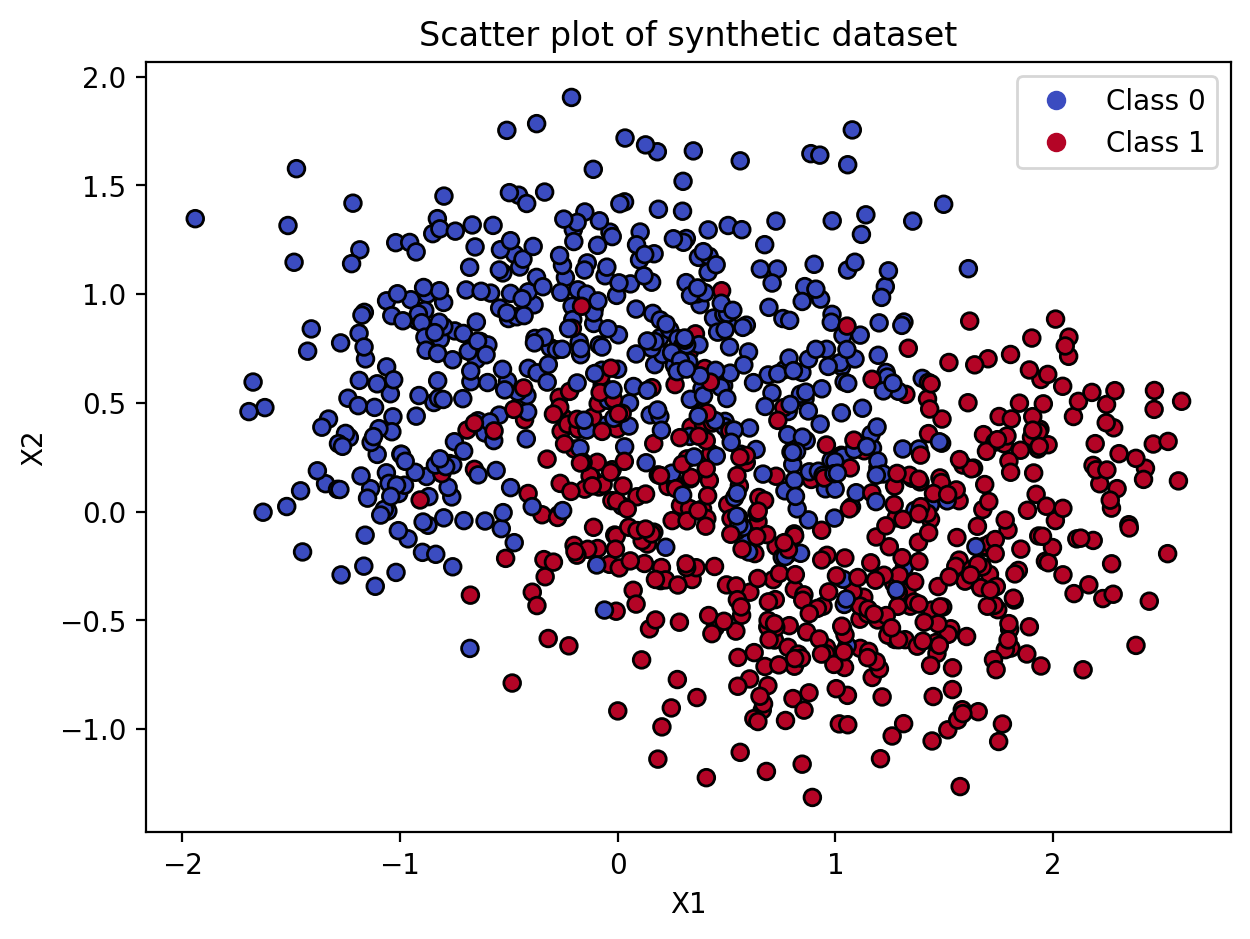

In [21]:
%config InlineBackend.figure_format = 'retina' # Makes the plots clear on high-res screens
colorpalette = plt.cm.coolwarm

# Create the plot
plt.figure(figsize=(7,5), dpi= 100) 
scatter = plt.scatter(X[:,0], X[:,1], c = y, cmap=colorpalette, marker='o', edgecolors='black')
plt.legend(handles=scatter.legend_elements()[0], labels=['Class 0', 'Class 1'])
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Scatter plot of synthetic dataset")
plt.show()

(c) Create 3 subsets with 100 samples and fit 3 KNN classifiers with $k = \{1, 25, 50\}$.

In [24]:
# create 3 subsets at random
idx1 = np.random.choice(np.arange(1000), 100, replace=True)
X1 = X[idx1, :]
y1 = y[idx1]

idx2 = np.random.choice(np.arange(1000), 100, replace=True)
X2 = X[idx2, :]
y2 = y[idx2]

idx3 = np.random.choice(np.arange(1000), 100, replace=True)
X3 = X[idx3, :]
y3 = y[idx3]

# fit KNN classifier on each subset
# fit KNN classifier on subset1
knn_1_1 = KNC(n_neighbors = 1).fit(X1, y1)
knn_1_25 = KNC(n_neighbors = 25).fit(X1, y1)
knn_1_50 = KNC(n_neighbors = 50).fit(X1, y1)
# fit KNN classifier on subset2
knn_2_1 = KNC(n_neighbors = 1).fit(X2, y2)
knn_2_25 = KNC(n_neighbors = 25).fit(X2, y2)
knn_2_50 = KNC(n_neighbors = 50).fit(X2, y2)
# fit KNN classifier on subset3
knn_3_1 = KNC(n_neighbors = 1).fit(X3, y3)
knn_3_25 = KNC(n_neighbors = 25).fit(X3, y3)
knn_3_50 = KNC(n_neighbors = 50).fit(X3, y3)

(D) Plot the decision boundary for each combination of dataset and trained classifier.

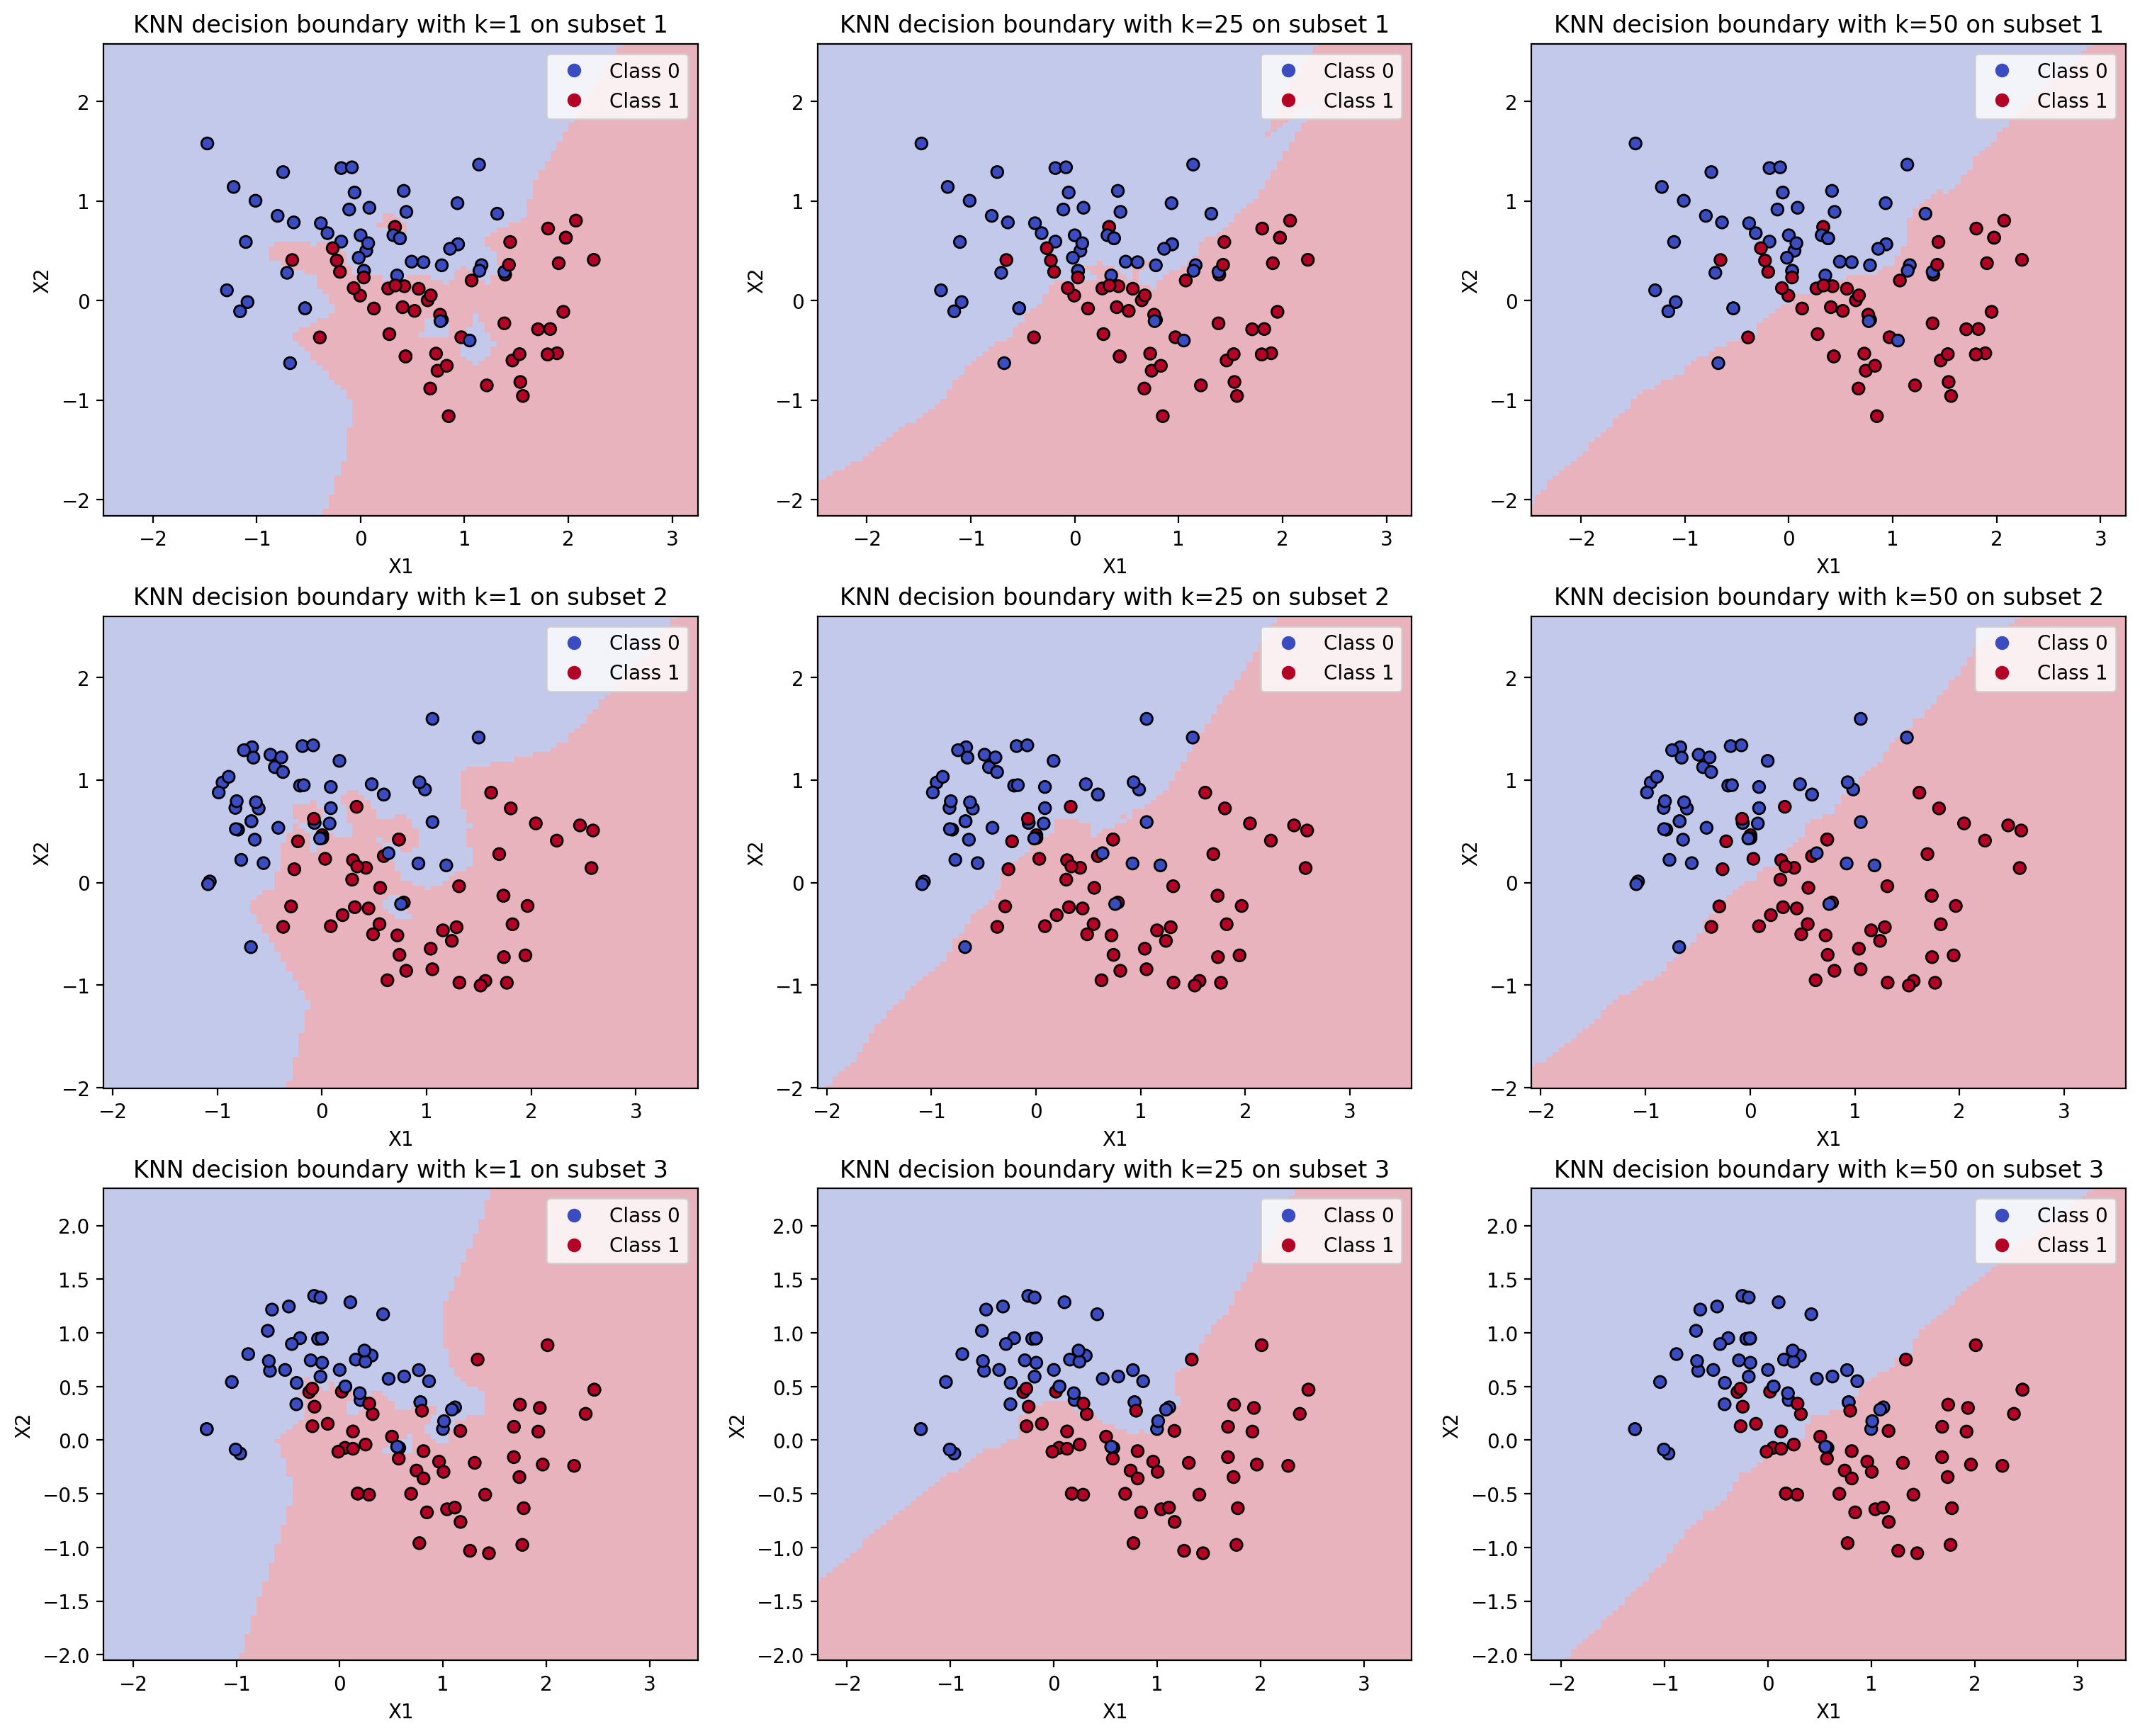

In [25]:
from sklearn.inspection import DecisionBoundaryDisplay
# put into list for iteration
list_X = [X1, X2, X3]
list_y = [y1, y2, y3]
list_knn = [knn_1_1, knn_1_25, knn_1_50, knn_2_1, knn_2_25, knn_2_50, knn_3_1, knn_3_25, knn_3_50]
list_K = [1, 25, 50]
list_subset = [1, 2, 3]

# create the plot
fig, ax = plt.subplots(3, 3)
#set size of the fig
fig.set_size_inches(15, 12)
fig.tight_layout(h_pad=3, w_pad=3)
for i in range(3):   # 3 rows, each row represent a different subset
    for j in range(3):    # 3 columns, each column represent a different k

        # plot the decision boundary
        DecisionBoundaryDisplay.from_estimator(
        list_knn[i*3+j],
        list_X[i],
        cmap=colorpalette,
        ax=ax[i, j],
        response_method="predict",
        plot_method="pcolormesh",
        shading="auto",
        alpha=0.3,
        )

        # plot the data points      
        scatter = ax[i, j].scatter(list_X[i][:,0], 
                                   list_X[i][:,1], 
                                   c = list_y[i], 
                                   cmap=colorpalette, 
                                   edgecolors='black'
                                   )

        # set the legend, title and axis
        ax[i, j].legend(handles=scatter.legend_elements()[0], labels=['Class 0', 'Class 1'])
        ax[i, j].set_xlabel("X1")
        ax[i, j].set_ylabel("X2")
        ax[i, j].set_title(f"KNN decision boundary with k={list_K[j]} on subset {list_subset[i]}",fontsize=12)
        ax[i, j].set_xlim(list_X[i][:,0].min()-1, list_X[i][:,0].max()+1)
        ax[i, j].set_ylim(list_X[i][:,1].min()-1, list_X[i][:,1].max()+1)

(e) Explain the difference between rows and column.

From left to right, as the value of $k$ increases, the decision boundaries become smoother. In the left column, when $k=1$, the decision boundary is very jagged and classifies each point accurately, but it results in overfitting. In the middle column, when $k=25$, the decision boundary is smoother. While it misclassifies some points, it is able to separate the two classes well and generalizes better than the left column. In the right column, when $k=50$, the decision boundary is very smooth but it fails to capture the half-moon-shaped decision boundary, leading to underfitting.

From top to bottom, with $k$ fixed, the decision boundary varies the most when $k=1$ among the three randomly generated subsets indicating high variance. As $k$ increases, the decision boundary becomes more stable and less sensitive to the random subsets.

(f) Explain the bias-variance tradeoff and its implications.

The plots in the left column with $k=1$ have a low bias but a high variance, which can lead to overfitting. This is because the model is too flexible and does not generalize well. As $k$ increases to 50, the plots in the right column have a low variance but a high bias, which can lead to underfitting. The model is too inflexible and unable to capture the underlying patterns in the data. The plots in the middle column with $k=25$ have a good balance between bias and variance. 

From this example, the bias-variance tradeoff implies that as the model becomes more complex, it will tend to reduce bias and increase variance, and vice versa. The key to training a good supervised machine learning algorithm is to achieve a balance between bias and variance that results in minimum error and good generalization performance on unseen data.

---

## 6
**[18 points] Bias-variance trade-off II: Quantifying the tradeoff**. This exercise explores the impact of the bias-variance tradeoff on classifier performance by looking at the performance on both training and test data.

Here, the value of $k$ determines how flexible our model is.

**(a)** Using the function created earlier to generate random samples (using the `make_moons` function setting the `noise` parameter to 0.35), create a new set of 1000 random samples, and call this dataset your test set and the previously created dataset your training set.

**(b)** Train a kNN classifier on your training set for $k = 1,2,...500$. Apply each of these trained classifiers to both your training dataset and your test dataset and plot the classification error (fraction of incorrect predictions).

**(c)** What trend do you see in the results?

**(d)** What values of $k$ represent high bias and which represent high variance?

**(e)** What is the optimal value of $k$ and why?

**(f)** In KNN classifiers, the value of k controls the flexibility of the model - what controls the flexibility of other models?

**ANSWER**

(a) Use *make_moons* function to generate test dataset.

In [26]:
from sklearn.datasets import make_moons

# training set, random state is the same as Question 6
Xtrain, ytrain = make_moons(n_samples=1000, noise=0.35, random_state=420)   
# test set 
Xtest, ytest = make_moons(n_samples=1000, noise=0.35, random_state=421)      

(b) Train a KNN classifier with $k=1,2,..., 500$ amd plot calssification error.

In [27]:
from sklearn.neighbors import KNeighborsClassifier as KNC
err_train = []
err_test = []
for k in range(1, 500+1):
    knc = KNC(n_neighbors=k).fit(Xtrain, ytrain)
    err_train.append(1 - knc.score(Xtrain, ytrain))  # classification error
    err_test.append(1 - knc.score(Xtest, ytest))

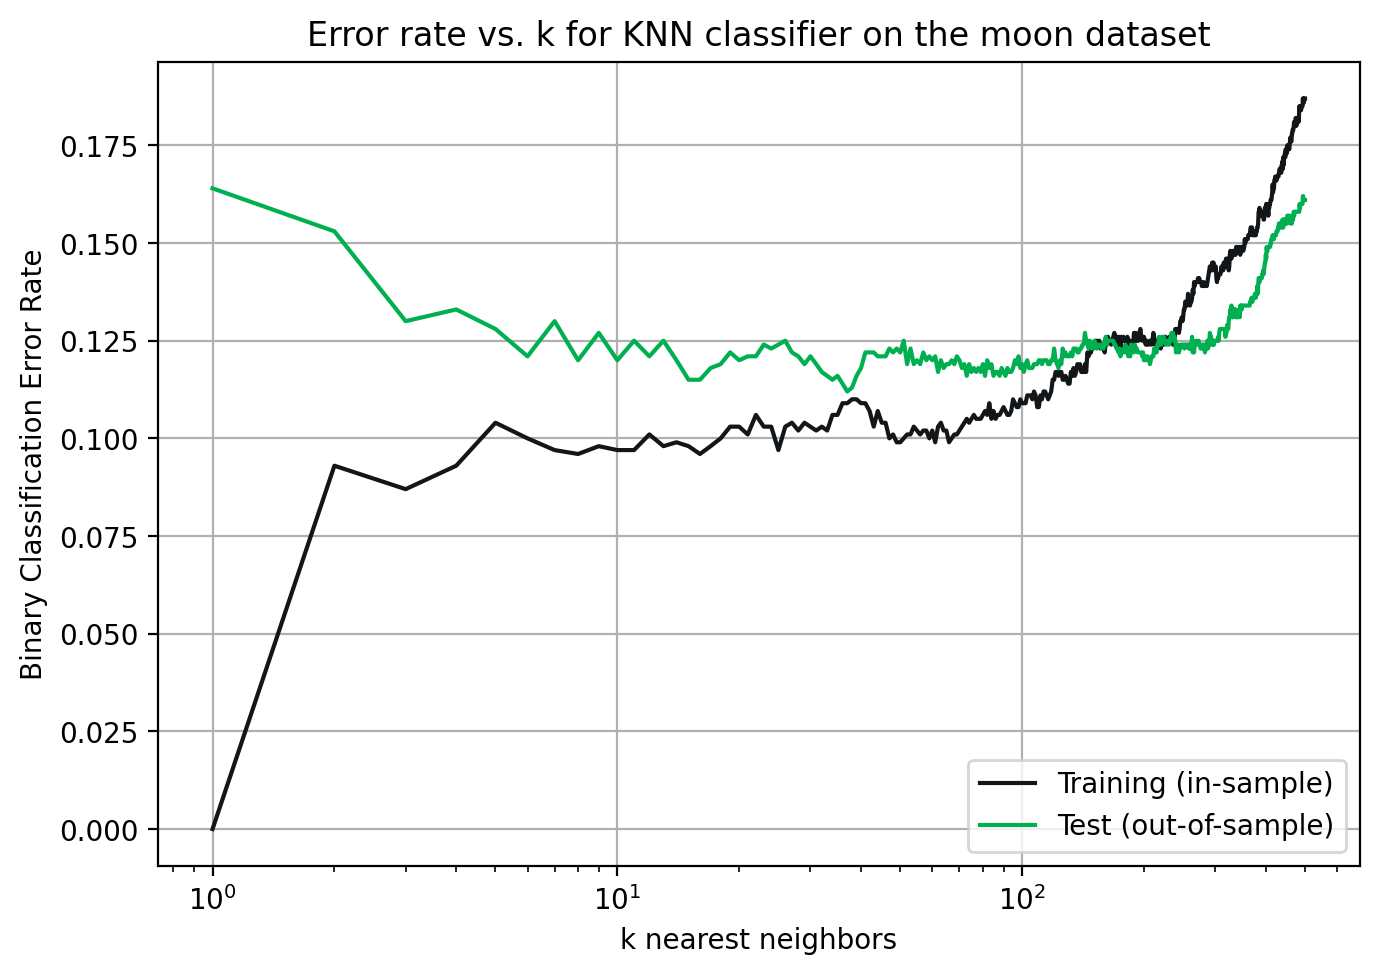

In [28]:
# plot the error rate of training and test set
plt.figure(figsize=(7,5), dpi= 100)
plt.semilogx(range(1, 501), err_train, color = "#121619", label='Training (in-sample)')
plt.semilogx(range(1, 501), err_test, color = '#00B050', label='Test (out-of-sample)')
plt.legend()
plt.grid('on')
plt.xlabel('k nearest neighbors') 
plt.ylabel('Binary Classification Error Rate')
plt.legend(loc = "lower right")
plt.title("Error rate vs. k for KNN classifier on the moon dataset")
plt.tight_layout() # Use this to maximize the use of space in the figure
plt.show()

(c) What trend do you see in the results?

As $k$ increases from 0 to 500, the training error starts at 0 and quickly increases. Meanwhile, the test error initially decreases, reaches a plateau, and then increases again.

(d) What values of $k$ represent high bias and which represent high variance?

A small value of $k$ $(<5)$ represents high variance and a large value of $k$ $(>300)$ represents high bias.

(e) What is the optimal value of $k$ and why?

In [29]:
k = range(1, 501)
optimal_k = k[err_test.index(min(err_test))]
print(f"The optimal value of k is {optimal_k}.")

The optimal value of k is 37.


The optimal value of k is approximately 37. This is because the test error is minimized at this value, and the model strikes a good balance between bias and variance.

(f) In KNN classifiers, the value of k controls the flexibility of the model - what controls the flexibility of other models?

In KNN classifiers, the value of $k$ controls the flexibility of the model. A smaller $k$ leads to a more flexible model and a larger $k$ leads to a less flexible model. 

In other models, the flexibility is controlled by other hyperparameters. Here are some examples:
- In linear regression, the flexibility is controlled by regularization parameter. A model with a larger regularization parameter is less flexible than a model with a smaller regularization parameter.
- In decision trees, the flexibility is controlled by the depth of the tree. A tree with a deeper depth is more flexible than a tree with a shallower depth.
- In neural networks, the flexibility is controlled by the number of layers and the number of neurons in each layer. A neural network with more layers and more neurons in each layer is more flexible than a neural network with fewer layers and fewer neurons in each layer.


---

## 7
**[18 points] Linear regression and nonlinear transformations**. Linear regression can be used to model nonlinear relationships when feature variables are properly transformed to represent the nonlinearities in the data. In this exercise, you're given training and test data contained in files "A2_Q7_train.csv" and "A2_Q7_test.csv" in the "data" folder for this assignment. Your goal is to develop a regression algorithm from the training data that performs well on the test data.

*Hint: Use the scikit learn [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) module.*

**(a)** Create a scatter plot of your training data.

**(b)** Estimate a linear regression model ($y = a_0 + a_1 x$) for the training data and calculate both the $R^2$ value and mean square error for the fit of that model for the training data. Also provide the equation representing the estimated model (e.g. $y = a_0 + a_1 x$, but with the estimated coefficients inserted. Consider this your baseline model against which you will compare other model options. *Evaluating performance on the training data is not a measure of how well this model would generalize to unseen data. We will evaluate performance on the test data once we see our models fit the training data decently well.*  

**(c)** If features can be nonlinearly transformed, a linear model may incorporate those non-linear feature transformation relationships in the training process. From looking at the scatter plot of the training data, choose a transformation of the predictor variable, $x$ that may make sense for these data. This will be a multiple regression model of the form $y = a_0 + a_1 z_1 + a_2 z_2 + \ldots + a_n z_n$. Here $z_i$ could be any transformations of x - perhaps it's $\frac{1}{x}$, $log(x)$, $sin(x)$, $x^k$ (where $k$ is any power of your choosing). Provide the estimated equation for this multiple regression model (e.g. if you chose your predictors to be $z_1 = x$ and $z_2 = log(x)$, your model would be of the form $y = a_0 + a_1 x + a_2 log(x)$. Also provide the $R^2$ and mean square error of the fit for the training data.

**(d)** Visualize the model fit to the training data. Using both of the models you created in parts (b) and (c), plot the original data (as a scatter plot) AND the curves representing your models (each as a separate curve) from (b) and (c).

**(e)** Now its time to compare your models and evaluate the generalization performance on held out test data. Using the models above from (b) an (c), apply them to the test data and estimate the $R^2$ and mean square error of the test dataset.

**(f)** Which models perform better on the training data, and which on the test data? Why?

**(g)** Imagine that the test data were significantly different from the training dataset. How might this affect the predictive capability of your model? How would the accuracy of generalization performance be impacted? Why?

*To help get you started - here's some code to help you load in the data for this exercise (you'll just need to update the path)*:

In [30]:
import numpy as np
import pandas as pd

path = 'F:/Duke MIDS/705_ML/Assignment/02/'
train = pd.read_csv(path + 'A2_Q7_train.csv')
test = pd.read_csv(path + 'A2_Q7_test.csv')

x_train = train.x.values
y_train = train.y.values

x_test = test.x.values
y_test = test.y.values

**ANSWER**

(a) Create a scatter plot of the training set.

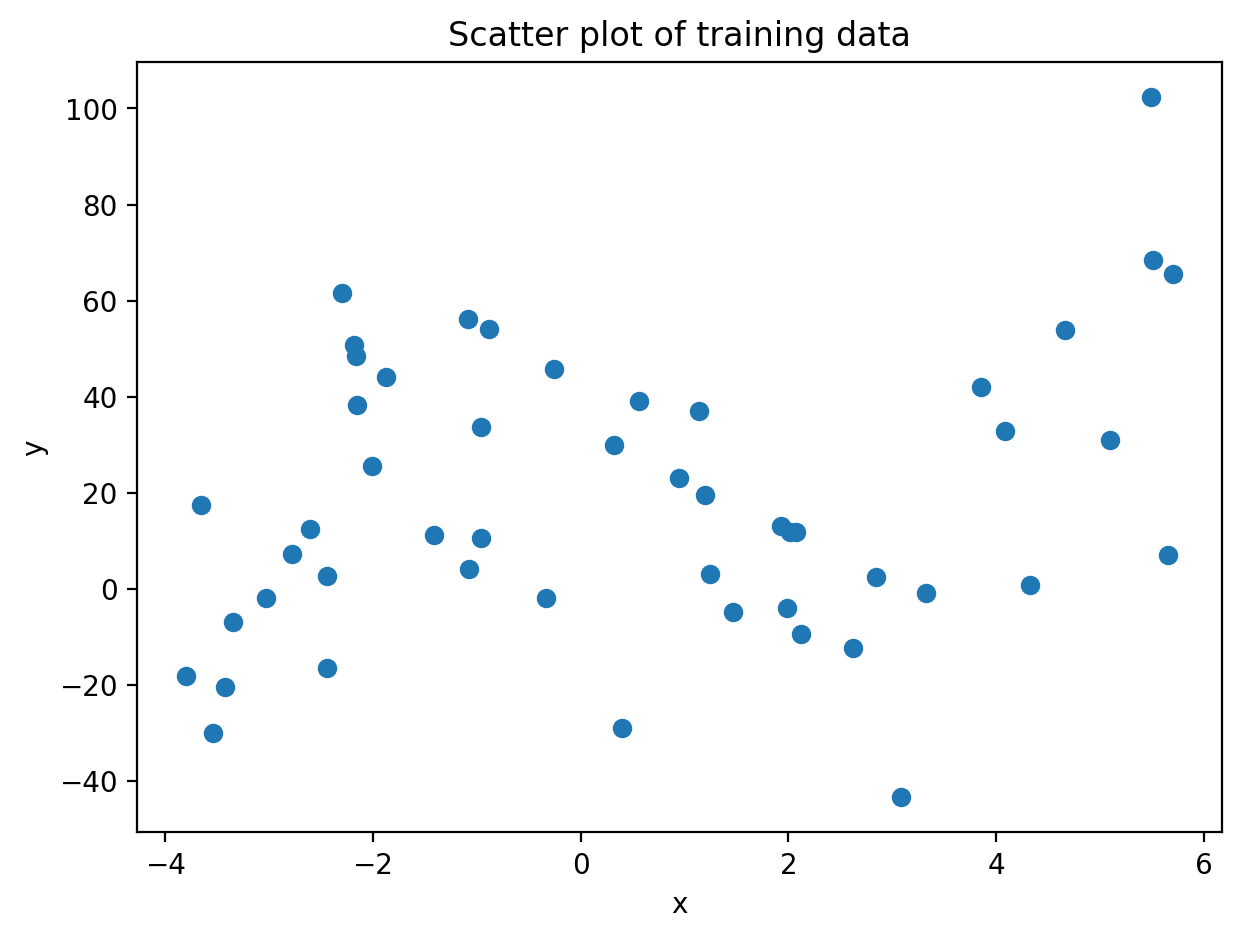

In [31]:
plt.figure(figsize=(7,5), dpi= 100)
plt.scatter(x_train, y_train)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of training data')
plt.show()

(b) Estimate a linear regression model, calculate $R^2$ and mean square error for the training data, and provide the model equation.

In [32]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error as MSE, r2_score as R2

# reshape the data
x_train = x_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# fit the model and get the metrics
lr_base = LR().fit(x_train, y_train)
ypred_7b = lr_base.predict(x_train)
r2_7b = R2(y_true=y_train, y_pred=ypred_7b)
mse_7b = MSE(y_true=y_train, y_pred=ypred_7b)
print(f"The R-square value for the fit of baseline model for the training data is {r2_7b:.2f}.")
print(f"The mean square error for the fit of baseline model for the training data is {mse_7b:.2f}.")

# get the estimated intercept and weight
lr_base_intercept = lr_base.intercept_[0]
lr_base_coef = lr_base.coef_[0][0]
print(f"Estimated intercept is {lr_base_intercept:.2f}, estimated weight is {lr_base_coef:.2f}.")

The R-square value for the fit of baseline model for the training data is 0.06.
The mean square error for the fit of baseline model for the training data is 791.42.
Estimated intercept is 17.20, estimated weight is 2.59.


Estimated linear regression model is: $y = 17.2 + 2.59x$

(c) Noninearly transform features in training set, fit the linear regression model and calculate performance metrics.

The scatter plot of the training data indicates there exists a term of $x^3$. Therefore, I estimated the equation to be $y = \alpha_0 + \alpha_1x_1 + \alpha_2x_2^2 + \alpha_3x_3^3$, and fit the model:

In [33]:
# Transform the training data
new_x_train = np.zeros((x_train.shape[0], 3))
new_x_train[:, 0] = x_train[:, 0]
new_x_train[:, 1] = x_train[:, 0] ** 2
new_x_train[:, 2] = x_train[:, 0] ** 3

# fit the model and get the metrics
lr_7c = LR().fit(new_x_train, y_train)
ypred_7c = lr_7c.predict(new_x_train)
r2_7c = R2(y_true=y_train, y_pred=ypred_7c)
mse_7c = MSE(y_true=y_train, y_pred=ypred_7c)
print(f"R-square value for the fit of model after transformation for the training data is {r2_7c:.2f}.")
print(f"Mean square error for the fit of model after transformation for the training data is {mse_7c:.2f}.")

# get the estimated intercept and weight
lr_7c_intercept = lr_7c.intercept_[0]
lr_7c_coef = ['{:.2f}'.format(coef) for coef in lr_7c.coef_[0]]
print(f"Estimated intercept is {lr_7c_intercept:.2f}, estimated weight is {lr_7c_coef}.")

R-square value for the fit of model after transformation for the training data is 0.40.
Mean square error for the fit of model after transformation for the training data is 510.88.
Estimated intercept is 24.16, estimated weight is ['-9.25', '-2.13', '0.90'].


Estimated linear regression model after nonlinear transformation is: $y = 24.16 - 9.25x - 2.13x^2 + 0.90x^3$

(d) Visualize the model fit from (b) and (c)

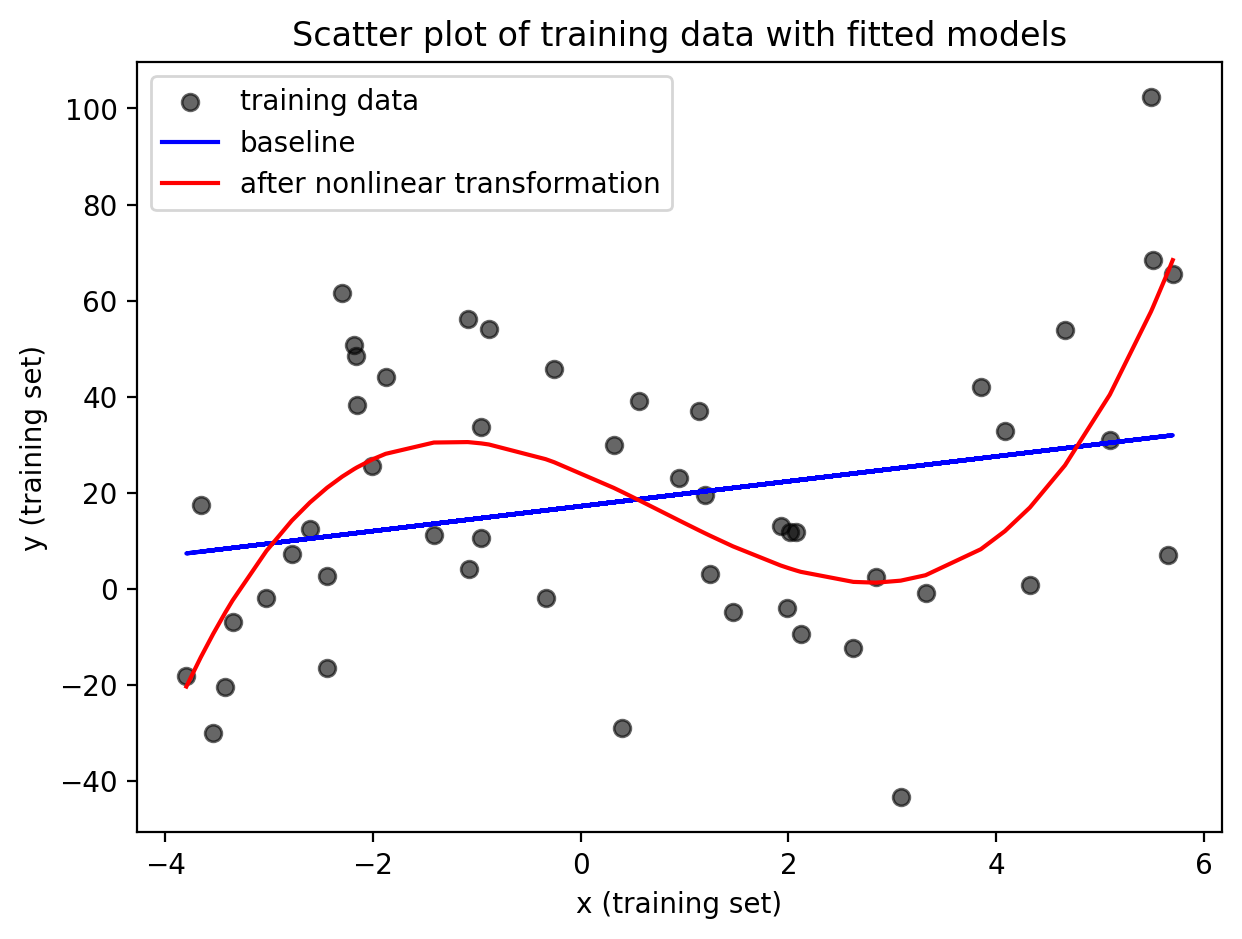

In [34]:
# prepare the data
x_train_plot = sorted(x_train)
idx = np.argsort(x_train.flatten())
ypred_plot = ypred_7c[idx]

# create the plot
plt.figure(figsize=(7,5), dpi= 100)
plt.scatter(x_train, y_train, c="black", alpha=0.6, label="training data")
plt.plot(x_train, ypred_7b, c='blue', label="baseline")
plt.plot(x_train_plot, ypred_plot, c='red', label="after nonlinear transformation")
plt.legend()
plt.xlabel('x (training set)')
plt.ylabel('y (training set)')
plt.title('Scatter plot of training data with fitted models')
plt.show()

(e) Compare the models on held out test data using $R^2$ and mean square error.

In [35]:
r2_base_test = R2(y_true=y_test, y_pred=lr_base.predict(x_test))
mse_base_test = MSE(y_true=y_test, y_pred=lr_base.predict(x_test))
print(f"R-square value for the fit of baseline model for the test data is {r2_base_test:.2f}.")
print(f"Mean square error for the fit of baseline model for the test data is {mse_base_test:.2f}.")

R-square value for the fit of baseline model for the test data is -0.13.
Mean square error for the fit of baseline model for the test data is 1116.66.


In [36]:
# Transform the test data
new_x_test = np.zeros((x_test.shape[0], 3))
new_x_test[:, 0] = x_test[:, 0]
new_x_test[:, 1] = x_test[:, 0] ** 2
new_x_test[:, 2] = x_test[:, 0] ** 3

# calculate the R-square and MSE for the test data
r2_7c_test = R2(y_true=y_test, y_pred=lr_7c.predict(new_x_test))
mse_7c_test = MSE(y_true=y_test, y_pred=lr_7c.predict(new_x_test))
print(f"R-square value for the fit of model after transformation for the test data is {r2_7c_test:.2f}.")
print(f"Mean square error for the fit of model after transformation for the test data is {mse_7c_test:.2f}.")

R-square value for the fit of model after transformation for the test data is 0.23.
Mean square error for the fit of model after transformation for the test data is 759.50.


(f) Which models perform better on the training data, and which on the test data? Why?

|                | Linear model | Non-linearly transformed model | 
|----------------|--------------|--------------------------------|
|  R^2_training  |      0.06    |                0.40            | 
|    R^2_test    |      -0.13   |                0.23            |
|  MSE_training  |     791.42   |               510.88           |
|     MSE_test   |    1116.66   |                759.5           | 


**The non-linearly transformed model performs better on both training and test data.** On both training and test data, the $R^2$ of the non-linear transformed model is higher than linear model, which means that a higher portion of the response variation can be explained by the predictors. The $MSE$ of the non-linear transformed model is lower than the linear model, which means that the non-linear transformed model has a lower error than the linear model. 

This is because the non-linear transformed model is more flexible than the linear model, making it better capture the nonlinear relationship between the predictors and the response, and generalize to the test unseen data.

(g) Imagine that the test data were significantly different from the training dataset. How might this affect the predictive capability of your model? How would the accuracy of generalization performance be impacted? Why?

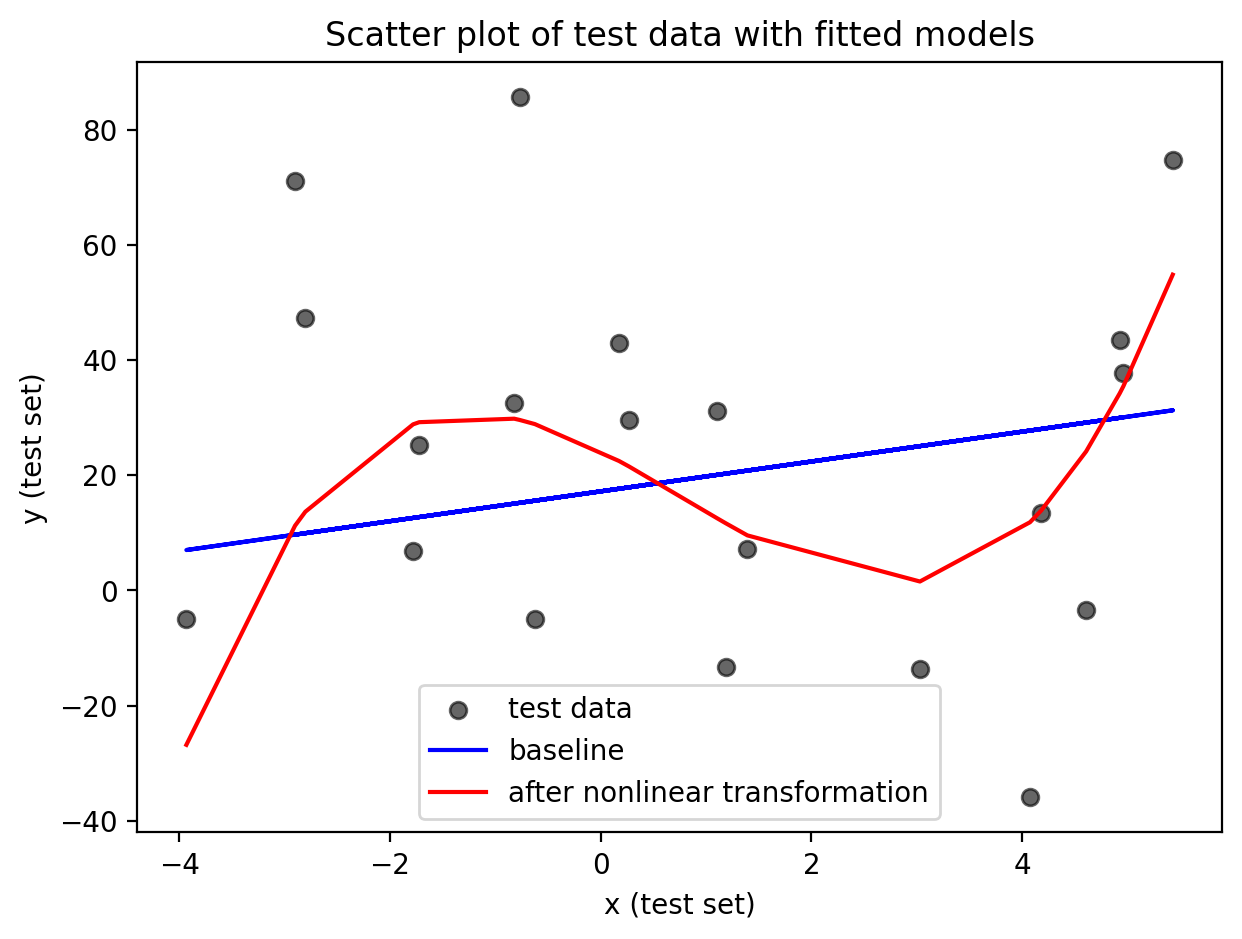

In [37]:
# prepare the data
ypred_7b_test = lr_base.predict(x_test)
ypred_7c_test = lr_7c.predict(new_x_test)
x_test_plot = sorted(x_test)
idx = np.argsort(x_test.flatten())
ypred_7c_test_plot = ypred_7c_test[idx]

# create the plot
plt.figure(figsize=(7,5), dpi= 100)
plt.scatter(x_test, y_test, c="black", alpha=0.6, label="test data")
plt.plot(x_test, ypred_7b_test, c='blue', label="baseline")
plt.plot(x_test_plot, ypred_7c_test_plot, c='red', label="after nonlinear transformation")
plt.legend()
plt.xlabel('x (test set)')
plt.ylabel('y (test set)')
plt.title('Scatter plot of test data with fitted models')
plt.legend(loc = 'best')
plt.show()

If the test data is significantly different from the training dataset, it might **negatively** impact the predictive capability of the model and the accuracy of generalization performance. It is likely to achieve a low $R^2$ and a high $MSE$ on test data. This is because the model's parameters have been trained on the training dataset, and it assumes that test data and training data have similar patterns. If the test data is vastly different, the model may not be able to recognize those patterns and will therefore have a lower accuracy of generalization performance.

Here I plotted the test data and the model fit from (b) and (c) to back up my point. Even though most points lie near the fitted non-linearly transformed model, there are still some points that are far away from the fitted model. This indicates that the model may not be able to generalize well to the test data if the test data is significantly different from the training dataset.